Цель работы - выявить закономерности для определения потенциально успешного продукта.
План работы :
1. Проверить данные
2. Провести анализ данных, определить потенциально прибыльные платформы
3. Посмотреть на различия по регионам
4. Проверить гипотизы
5. Подготовить обший вывод


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

### Импорт данных

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data # смотрим как выглядит датафрейм

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
data.duplicated().sum() # явные дубликаты не найдены

0

In [6]:
data['Name'].value_counts() 
data.loc[data['Name'] == 'Need for Speed: Most Wanted'] # проверяем повторяющиеся значения Name, при примере NFS

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


### Подготовка данных

In [7]:
data.info() # смотрим информацию по типам данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
data.columns = data.columns.str.lower() # приводим название столбцов к нижнему регистру

In [9]:
data.isna().sum() # проверяем пропуски

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [10]:
data.loc[data['name'].isnull()] # без названия игры эти данные нам ничем не помогут, так же в этих строках есть 2 пропуска жанра

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [11]:
data = data.dropna(subset = ['name']) # убираем отсутсвующие значения с названием игры

In [12]:
data['year_of_release'].isnull().value_counts() # Проверяем кол-во пропушенных значений
data = data.dropna(subset = ['year_of_release'])
data['year_of_release'].isnull().value_counts()
data['year_of_release'] = data['year_of_release'].astype('int') # меняем тип данных на целые, так как год выпуска не может быть не целым числом

In [13]:
data['user_score'].unique() # в значения присутсвует сокращение tbd (To Be Determined - будет определено)
data.loc[data['user_score'] == 'tbd'] # будем считать ,что это игры без рейтинга, присвоим им значение Nan

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [14]:
data['user_score'] = pd.to_numeric(data['user_score'],errors = 'coerce') # поменяем тип данных на вещественные,т.к. в рейтинге используются численные значения, присвоим tbd значение Nan

In [15]:
data.loc[data['rating'].isnull()] # посмотри на пропуски в столбце возрастной рейтинг. 
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [16]:
data['rating'] = data['rating'].fillna('RP') # присвоим пропускам значения RP - в ожидании оценки

In [17]:
data['rating'].value_counts() # Проверяем кол-во значений рейтинга, последние 3 значения можно удалить из-за незначительного кол-ва

RP      6677
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
Name: rating, dtype: int64

In [18]:
data = data.loc[(data['rating'] != 'EC')] 
data = data.loc[(data['rating'] != 'K-A')]
data = data.loc[(data['rating'] != 'AO')]

In [19]:
data.isna().sum() # выводим оставщиеся пропуски

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8451
user_score         8974
rating                0
dtype: int64

In [20]:
data.duplicated().sum()

0

####  Вывод

Остались пропуски в столбцах - рейтинг критиков, оценки игроков, и возрастной рейтинг. Удаление или замена пропусков может существенно повлиять на результат исследования, поэтому оставляем там пропуски. Возможные причины пропусков в том,что игры не публиковались на специальных ресурсах , где критики и пользователи могли бы выставлять свои оценки. Отсутствие возрастного рейтинга, возможно связано с тем,что присваивание рейтинга добровольное, и данные игры не проверялись. Так же, из-за того ,что ESRB работает только с 1994 года, игры выщедшие до этого, еще не получили свой рейтинг. 

### Исследовательский анализ данных

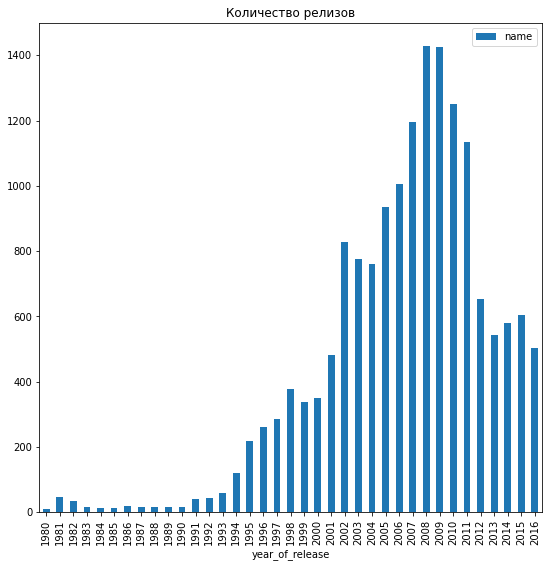

In [21]:
data_year = data.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count') # кол-во релизов по годам
data_year.plot( kind = 'bar', figsize = (9,9),title = 'Количество релизов');

Данные показывают , что кол-во выпускаемых игр , в целом , снижается с 2008 года. Возможно,несмотря на уменьшения кол-ва игр, продажи оставшихся растут.

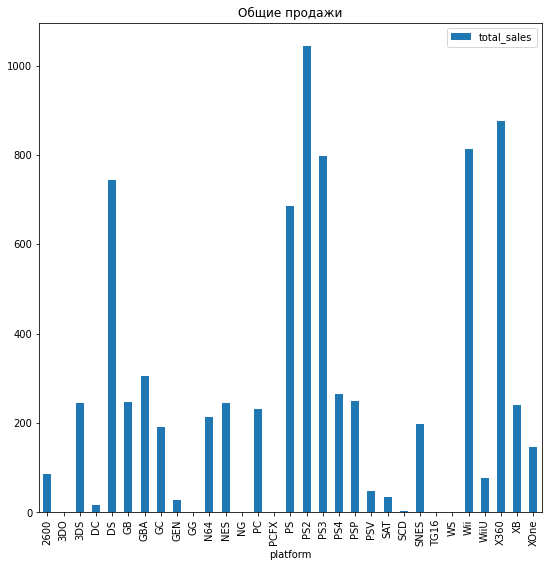

In [22]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] # добавляем столбец - Итоговые продажи
data_platform = data.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum' )
data_platform.plot( kind = 'bar', figsize = (9,9),title = 'Общие продажи'); # График общих продаж по платформам

In [23]:
data_platform.reset_index(drop = False, inplace = True)
data_platform_10 = data_platform.sort_values(by = 'total_sales',
                                             ascending=False).head(10) # Выделяем ТОП 10 по продажам

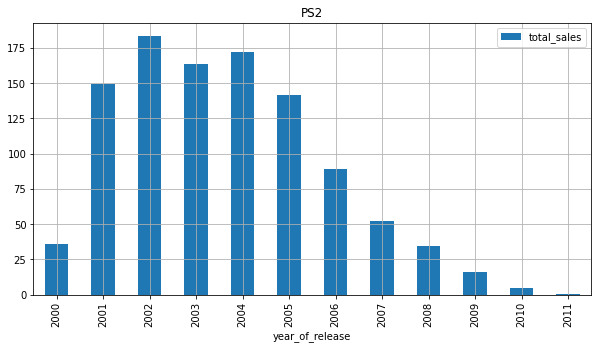

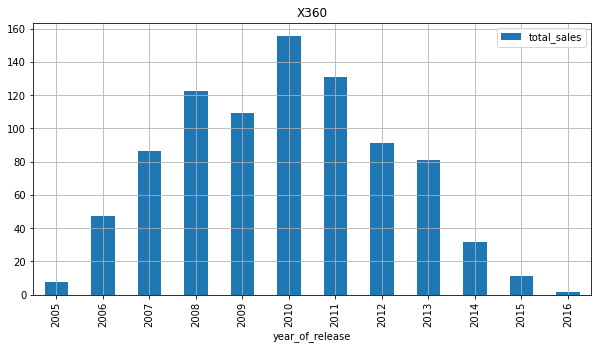

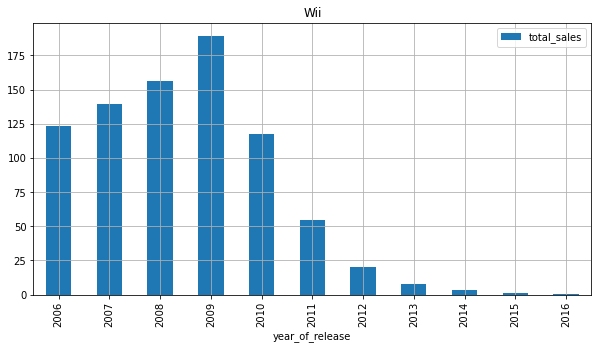

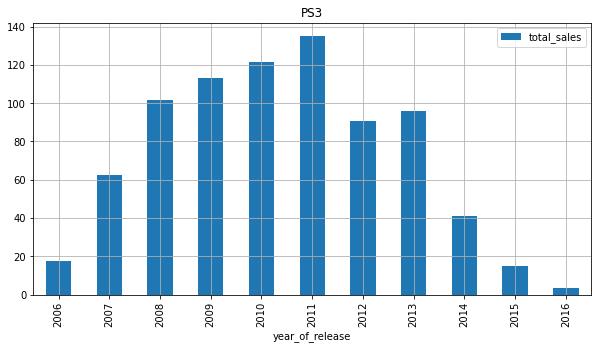

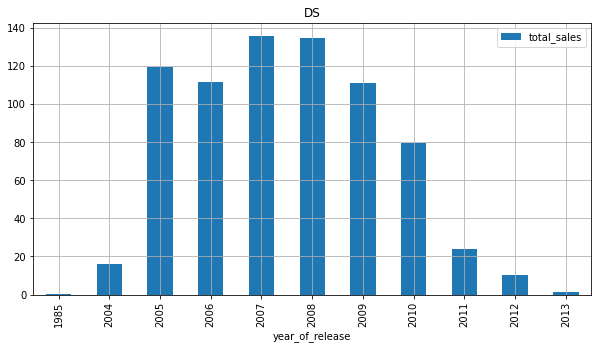

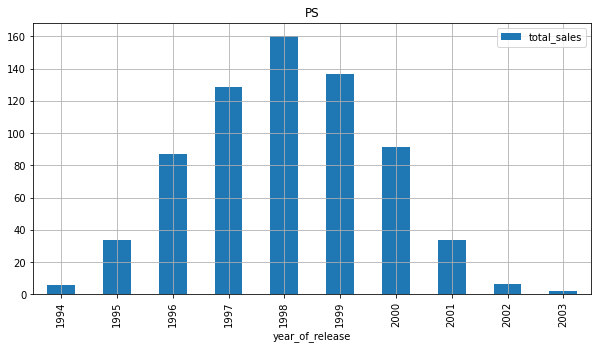

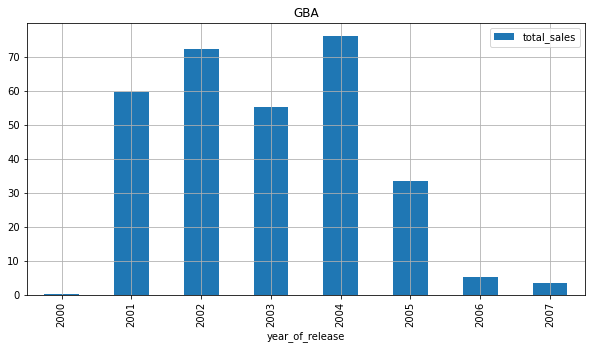

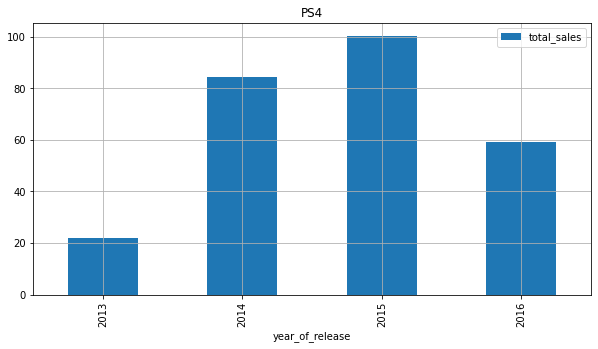

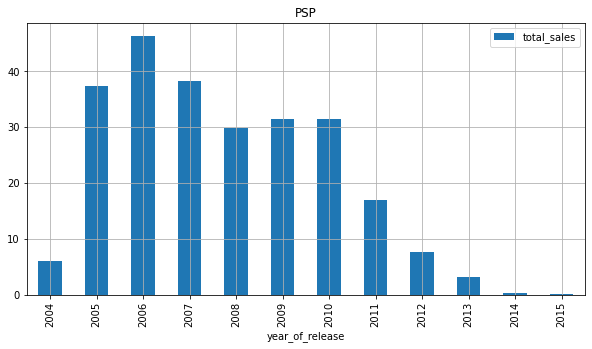

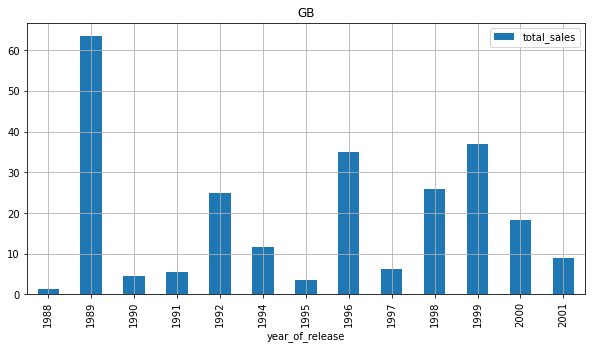

In [24]:
for index in data_platform_10['platform'].unique() : # строим графики распределения по продажи/год для каждой платформы
    data[data['platform'] == index].pivot_table(
                                                index = 'year_of_release', values = 'total_sales',
                                                aggfunc = 'sum'
                                                ).plot( kind = 'bar', grid = True, figsize = (10,5) ,title = index)


In [25]:
# В распределении на платформе DS есть данные за 1985 год, надо проверить дополнительно
data.query('platform == "DS" & year_of_release == 1985') # данные явно ошибочные, так как релизы начинаются только в 2004 году
data = data.loc[data['name'] != 'Strongest Tokyo University Shogi DS']

Получаеться следующее время существования платформы:
1. PS2 - 11 лет
2. XBOX360 - 11 лет
3. WII - 10 лет
4. PS3 - 10 лет
5. DS - 9 лет
6. PS - 9 лет
7. GBA - 7 лет
8. PS4 - 4 года
9. PSP - 11 лет
10. XB - 9 лет

Из графиков видно,что новый платформы , в среднем , появляются раз в 7 лет, а существуют , в среднем - 10 лет

Пик выхода игр пришелся на 2008 - 2009 год, с 2010 началось уменьшение кол-ва релизов.С учетом того ,что часть платформ появилась только в 2013 году, актуальный период,будем считать, с 2013 по 2016 год.

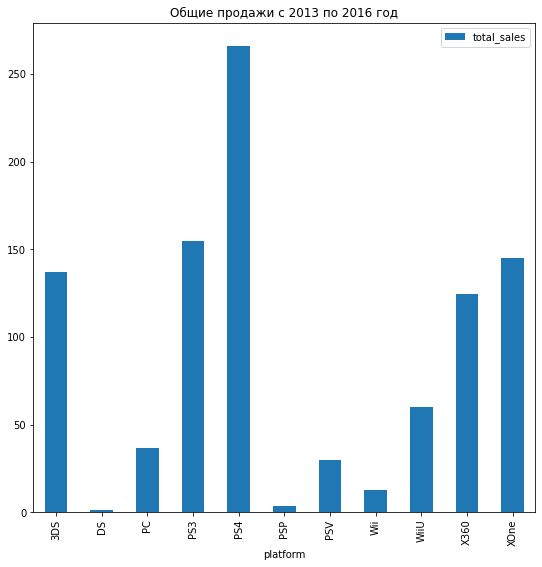

In [26]:
data_actual = data.loc[data['year_of_release'] >= 2013] # берем данные с 2013 года
#data_actual.sort_values( by = 'year_of_release' , ascending = False)
data_platform_actual = data_actual.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum' )
data_platform_actual.plot( kind = 'bar', figsize = (9,9),title = 'Общие продажи с 2013 по 2016 год'); # смотрим на продажи по платформам с 2013 года

In [27]:
data_platform_actual.reset_index(drop = False, inplace = True)

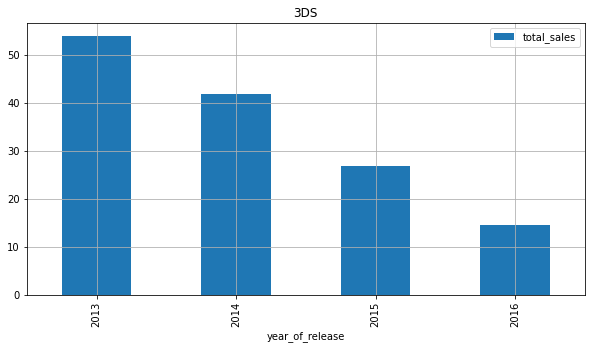

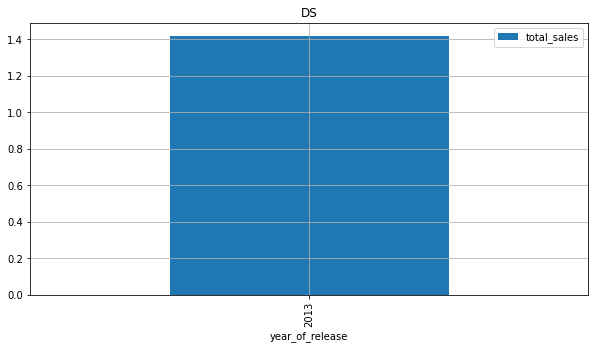

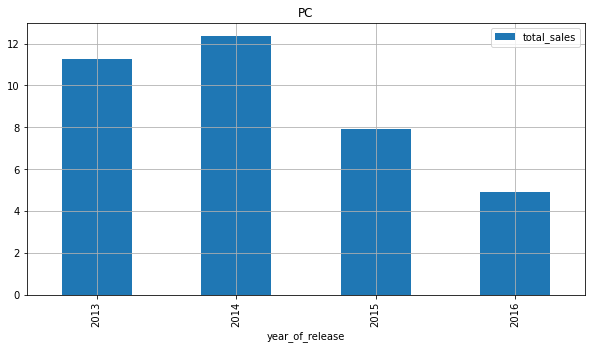

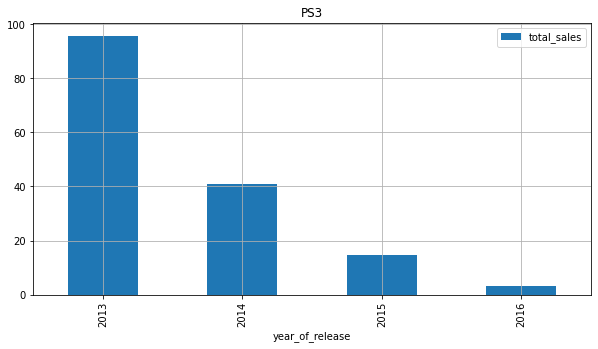

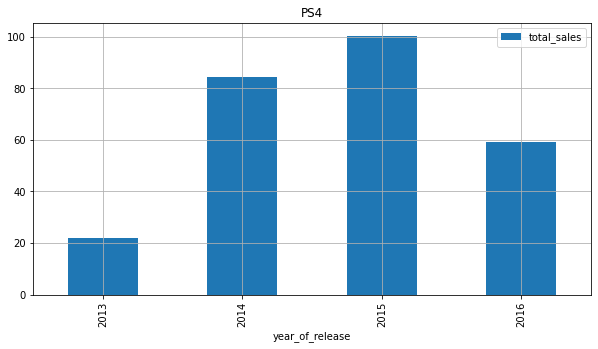

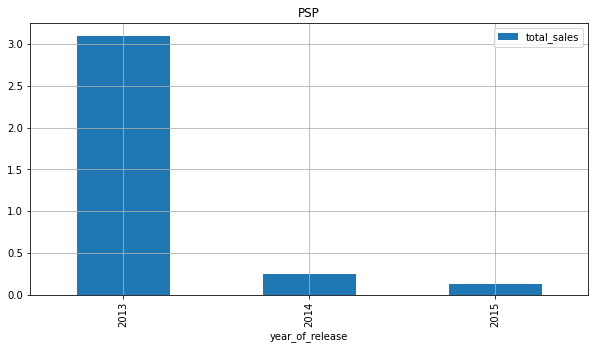

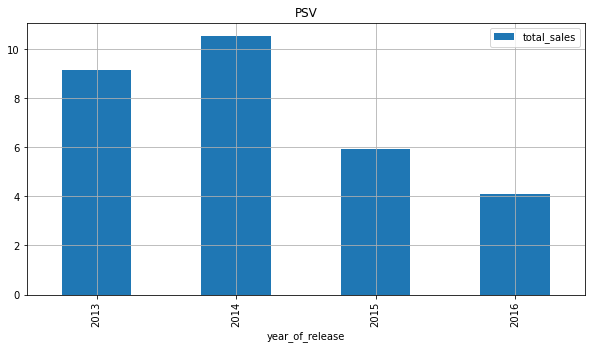

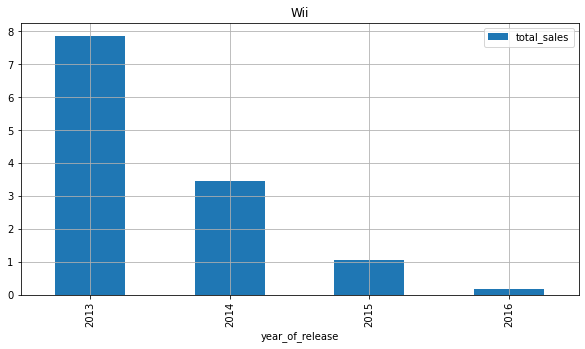

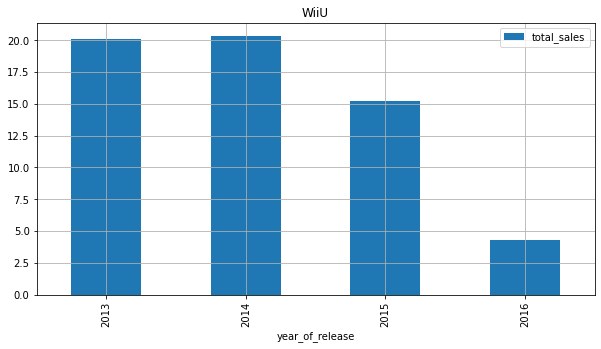

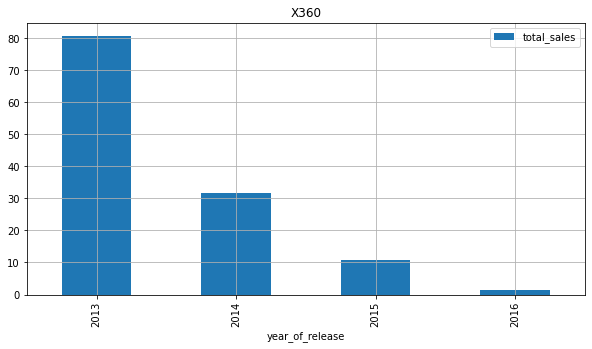

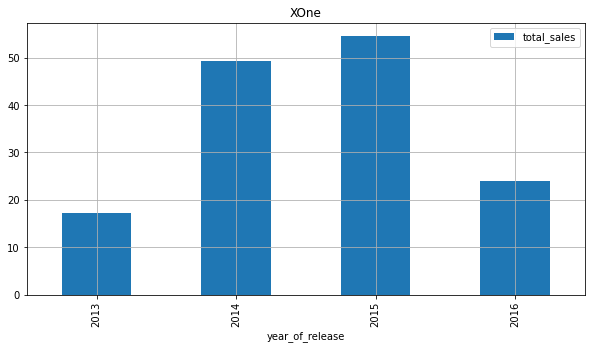

In [28]:
for index in data_platform_actual['platform'].unique(): # строим распределение по годам/продажам для каждой платформы
    data_actual[
               data_actual['platform'] == index
               ].pivot_table(
                            index = 'year_of_release', values = 'total_sales', aggfunc = 'sum'
                            ).plot( kind = 'bar',grid = True, figsize = (10,5) ,title = index);


Продажи по всем платформам уменьшились к 2016 году, при этом у PS4, WiiU и XOne до 2016 года был рост.Для определения потенциально прибыльных платформ посчитаем возможную будущуюю прибыль, в зависимости от оставщего срока жизни платформы.

In [29]:
data_life_time = data.query('year_of_release != 0') # Посмотрим на возраст платформ на 2016 год

In [30]:
data_life_time =  data_life_time.groupby('platform')['year_of_release'].agg({'min','max'}) # Определяем период сущ. платформы

In [31]:
data_life_time['lifetime'] = data_life_time['max'] - data_life_time['min'] # Вычисляем возраст платформы
data_life_time.reset_index(drop = False , inplace = True)

In [32]:
data_platform_actual = data_platform_actual.merge(data_life_time,how = 'left') #  Заполняем данные для актуальных платформ

In [33]:
year_count = 4 # период с 2013 по 2016 год
data_platform_actual['sales_per_year'] = data_platform_actual['total_sales']/year_count # Считаем среднегодовые продажи 
data_platform_actual.loc[data_platform_actual['platform'] == 'PC','lifetime'] = 4 # PC присвоим возраст поколения новых приставок

In [34]:
data_platform_actual['future_value'] = (11 - data_platform_actual['lifetime'])*data_platform_actual['sales_per_year'] 
# считаем возможную будущуую прибыль в зависомости от оставщегося срока существования платформы ( ср.срок - 11 лет)

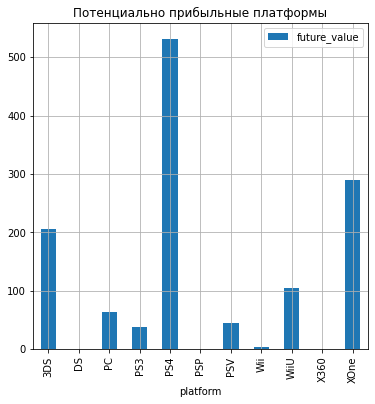

In [35]:
data_platform_actual.plot (kind = 'bar', x = 'platform',
                           y = 'future_value', grid = True,
                           figsize = (6,6), title = 'Потенциально прибыльные платформы');
#Потенциально прибыльные платформы

Самыми перспективные это - PS4,XOne и 3DS

Сделаем прогноз по продажам на 2017 год. Так как с 2015 началось падение продаж, предположим ,что в 2017 году оно продолжится, для этого рассчитаем  процент падения для каждой платформы и применим его к продажам за 2016 год.

In [36]:
actual_2016 = data.loc[
                            data['year_of_release'] >= 2016
                           ].groupby('platform')['total_sales'].agg('sum') # Данные о продажах за 2016 год

In [37]:
actual_2015 = data.loc[
                            data['year_of_release'] >= 2015
                           ].groupby('platform')['total_sales'].agg('sum') # Данные о продажах за 2015 год

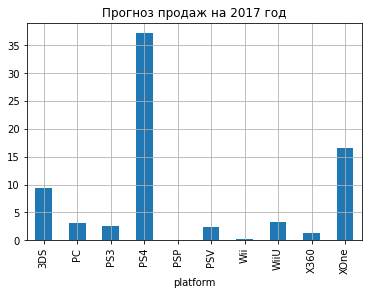

In [38]:
data_decreas = (actual_2016*(round(((actual_2015 - actual_2016)/actual_2015)*100,2)/100)).plot(kind = 'bar', grid = True);
plt.title('Прогноз продаж на 2017 год');
plt.show()
# Прогноз по прибыли на 2017 год, при условии аналогичного снижение продаж

Вывод : Потенциально прибыльные платформы 3DS , PS4 и XOne , максимальные продажи в 2017 у PS4, Xone и 3DS

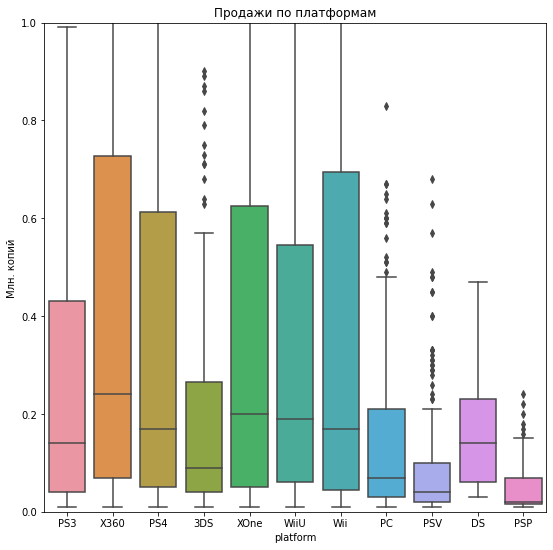

In [39]:
plt.figure(figsize = (9,9))
sns.boxplot(data = data_actual ,x = 'platform',y = 'total_sales').set(title='Продажи по платформам', ylabel = 'Млн. копий');
plt.ylim(0,1)
plt.show()

Диаграммы имеют положительную ассиметрию, медиана больше среднего, большая часть игр продается тиражем около от 50 до 750 т. копий.

In [40]:
sales_corr_PS4 = data_actual[data_actual['platform'] == 'PS4'].pivot_table(index = 'total_sales', 
                                                              values = ['critic_score','user_score'],
                                                              aggfunc = 'median')

In [41]:
sales_corr_PS4.reset_index(drop = False,inplace = True)

              total_sales  critic_score  user_score
total_sales      1.000000      0.492717   -0.110440
critic_score     0.492717      1.000000    0.408972
user_score      -0.110440      0.408972    1.000000


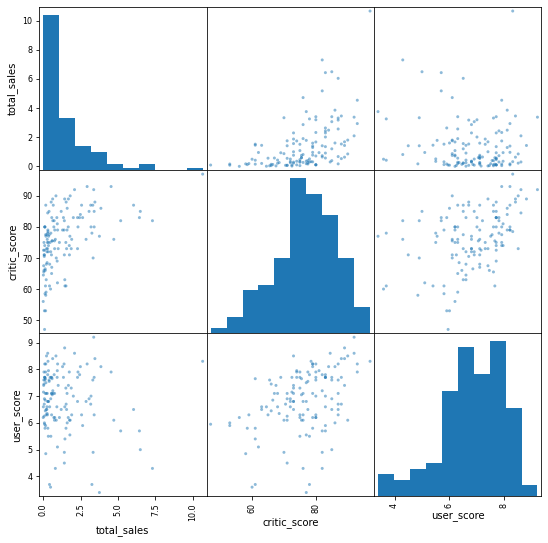

In [42]:
print(sales_corr_PS4.corr()) #  Посмотри как коррелируются продажи в зависимости от оценки пользователей и критиков
pd.plotting.scatter_matrix(sales_corr_PS4, figsize = (9,9));

In [43]:
for index in data_actual['platform'].unique() :
    sales_corr = data_actual[data_actual['platform'] == index].pivot_table(index = 'total_sales', 
                                                              values = ['critic_score','user_score'],
                                                              aggfunc = 'median')
    sales_corr.reset_index(drop = False,inplace = True)
    print(f'Корреляция оценок платформы {index} : {sales_corr.corr()}')
    

Корреляция оценок платформы PS3 :               total_sales  critic_score  user_score
total_sales      1.000000      0.391171   -0.002154
critic_score     0.391171      1.000000    0.437839
user_score      -0.002154      0.437839    1.000000
Корреляция оценок платформы X360 :               total_sales  critic_score  user_score
total_sales      1.000000      0.359381   -0.027278
critic_score     0.359381      1.000000    0.429559
user_score      -0.027278      0.429559    1.000000
Корреляция оценок платформы PS4 :               total_sales  critic_score  user_score
total_sales      1.000000      0.492717   -0.110440
critic_score     0.492717      1.000000    0.408972
user_score      -0.110440      0.408972    1.000000
Корреляция оценок платформы 3DS :               total_sales  critic_score  user_score
total_sales      1.000000      0.377548    0.280627
critic_score     0.377548      1.000000    0.699431
user_score       0.280627      0.699431    1.000000
Корреляция оценок платформы XOn

Больше на продажи влияет оценка критиков,чем оценки пользователей.

In [44]:
data_actual_genre = data_actual.pivot_table( index = 'genre', values = 'total_sales', aggfunc = 'median')

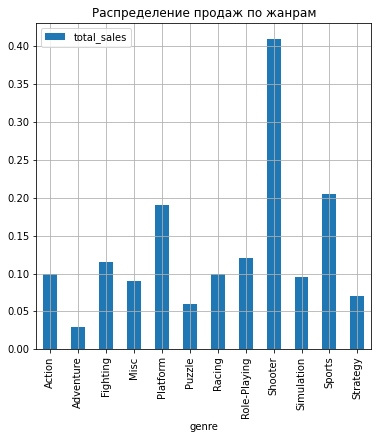

In [45]:
data_actual_genre.plot(kind = 'bar', 
                       grid = True, figsize = (6,6),
                       title = 'Распределение продаж по жанрам'); # Посмотрим на распределение продаж по жанрам

Вывод : Потенциально прибыльные платформы - 3DS , PS4 и XOne, наиболее продаюшийся жанр - шутеры.Максимальный прогноз продаж на 2017 год у платформы - PS4. Оценки критиков и пользователь слабо влияет на продажи!

### Портрет пользователя по регионам

In [46]:
user_na = data_actual.pivot_table( index = 'platform', values = 'na_sales',aggfunc ='sum')
user_jp = data_actual.pivot_table( index = 'platform', values = 'jp_sales',aggfunc ='sum')
user_eu = data_actual.pivot_table( index = 'platform', values = 'eu_sales',aggfunc ='sum')


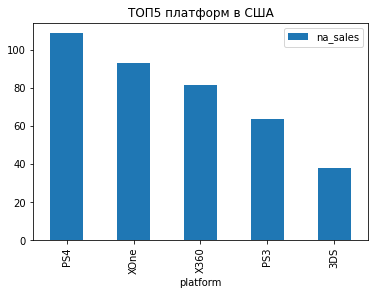

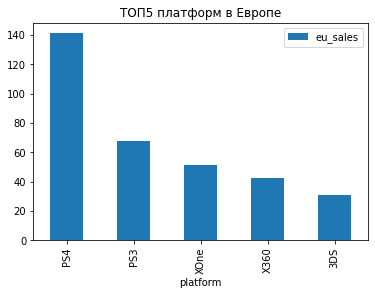

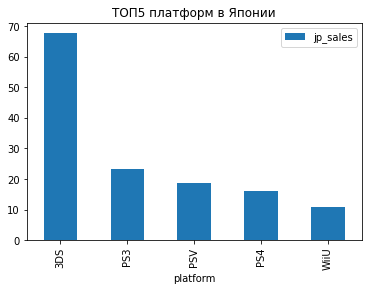

In [64]:
user_na.sort_values(by = 'na_sales', ascending = False).head(5).plot( kind = 'bar', title = 'ТОП5 платформ в США');
user_eu.sort_values(by = 'eu_sales', ascending = False).head(5).plot( kind = 'bar', title = 'ТОП5 платформ в Европе');
user_jp.sort_values(by = 'jp_sales', ascending = False).head(5).plot( kind = 'bar', title = 'ТОП5 платформ в Японии');


Распределение продаж по платформам в Америке и Европе в целом похожи, Европейцы и Американцы любят одинаковые игры для обычных консолей,и в обоих случаях лидирует PS4.В Японии более популярны игры для портативных консолей.

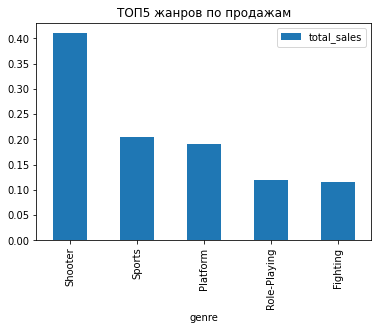

In [48]:
data_actual_genre.sort_values( by = 'total_sales', ascending = False).head(5).plot(kind = 'bar',
                                                                                   title = 'ТОП5 жанров по продажам');
# Определим ТОП5 жанров

В топе жанры традиционно популярные на консолях.

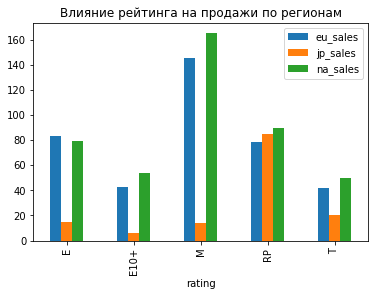

In [49]:
data_rating = data_actual.pivot_table( index = 'rating', values = ['na_sales','eu_sales','jp_sales'], aggfunc = 'sum')
data_rating.plot(kind = 'bar', title = 'Влияние рейтинга на продажи по регионам'); # посмотрим на влияние рейтинговых оценок на продажи по регионам

В США и Европе, ограничение по возрасту не приводит к уменьшению продаж, наоборот игры с взрослым рейтингом в лидерах. В Японии картины другая, при выставлении рейтинга продажи значительно уменьшаются, по сравнению с играми без рейтинга.

### Проверка гипотиз

 Проверим гипотизу ,что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
 
 Нулевая гипотиза - среднее рассматриваемых генеральных совокупностей равны.
 
 Альтернативная гипотиза  - среднее рассматриваемых генеральных совокупностей не равны

In [50]:

pc_score = data_actual.loc[data_actual['platform'] == 'PC']['user_score']
pc_score = pc_score.dropna()
x_one_score = data_actual.loc[data_actual['platform'] == 'XOne']['user_score']
x_one_score.dropna = x_one_score.dropna()


In [51]:
from scipy import stats as st
import numpy as np

In [55]:

alpha = .05
results = st.ttest_ind(
    pc_score.head(150) , 
    x_one_score.head(150),equal_var = False,nan_policy='omit')

print('p-значение:', results.pvalue)
print('Cреднее значение pc_score',pc_score.mean())
print('Cреднее значение pc_score',x_one_score.mean())

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.18469597173708266
Cреднее значение pc_score 6.2696774193548395
Cреднее значение pc_score 6.521428571428572
Не получилось отвергнуть нулевую гипотезу


Проверим гипотизу, что средние пользовательские рейтинги жанров Action и Sports разные.

Нулевая гипотиза - среднее рассматриваемых генеральных совокупностей  равны

Альтернативная гипотиза - среднее рассматриваемых генеральных совокупностей не равны

In [53]:
action_score = data_actual.loc[data_actual['genre'] == 'Action']['user_score']
action_score = action_score.dropna()
sport_score = data_actual.loc[data_actual['genre'] == 'Sports']['user_score']
sport_score = sport_score.dropna()

In [54]:
alpha = .05
results = st.ttest_ind(
    action_score.head(160) , 
    sport_score.head(160),equal_var = False,nan_policy='omit')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.6092274056169247e-18
Отвергаем нулевую гипотезу


### Общий вывод

В ходе исследования были выполнены следующие действия:
- Были изучены и подготовлены предоставленные данные. Определены и заполнены, где возможно, пропуски, изменениы типы данных и названия столбцов.
- Посчитаны суммарные продажи по всем регионам
- Кол-во выпускаемых игр за разные годы
- Исследованы продажи по платформам
- Определены потенциально прибыльные платформы, составлен прогноз по продажам на 2017 год
- Определена корреляция между оценками игр и продажами
- Посчитано распределение продаж по жанрам
- Определены самые популярные платформы и жанры
- Выявлено влияние рейтинга игры на продажи в разных регионах
- Проверена гипотиза о равенстве средних оценок на платформах PC и  Xone
- Проверена гипотиза о равенстве средних оценок игр жанров Action и Sports

В результате исследования были сделаны следующие выводы :
- Количество выпускаемых игр снижается с 2008 года, максимальное кол-во игр выходило в период с 2007 по 2010 года
- Наибольшее кол-во игр было продано на платформе PS2 
- Среднне время жизни платформы - 10 лет, платформы обновляеются, в среднем раз , в 7 лет
- В период с 2013 по 2016 год по продажам лидирует  PS4
- В 2016 годы все платформы показали падение продаж
- Потенциально прибыльные платформы - 3DS , PS4 и XOne , максимальные планируемые продажи в 2017 у PS4
- В основном игры продаются тиражем до 750 тыс. копий
- Корреляция продаж игр с оценками критиков слабая (около 0.49 ), с оценками пользователей практически нет.
- Самые популярные жанры по медианному кол-ву продаж : Shooter - около 400.000 проданных копий и Sports - около 200.000 проданных копий
- Распределение продаж по платформам в Америке и Европе в целом похожи, Европейцы и Американцы любят одинаковые игры для обычных     консолей,и в обоих случаях лидирует PS4.В Японии более популярны игры для портативных консолей.
- В США и Европе, ограничение по возрасту не приводит к уменьшению продаж, наоборот игры с взрослым рейтингом в лидерах. В Японии картины другая, при выставлении рейтинга продажи значительно уменьшаются, по сравнению с играми без рейтинга
- Гипотиза о равенстве оценок платформ не может быть отвергнута
- Гипотиза о равенстве оценок жанров может быть отвергнута
- На успешность игры влияет платформа - PS4 или XOne, жанр  - шутер или спортивные игры и рейтинг ESRB, и слабо влияет рейтинг критиков и пользователей.
- Самый , потенциально, успешный продукт в 2017 году, это игра жанра - Shooter, на платформе  PS4 и взрослым рейтингом.